<a href="https://colab.research.google.com/github/ericasilva1994/ibovespa-dataset/blob/main/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
# Importando os pacotes que serão utilizados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df_original = pd.read_csv('/content/Dados Históricos - Ibovespa Gabi.csv')

In [5]:
#Analise macro do conjunto de dados
df_original.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.07.2025,133.38,135.56,135.56,133.30,"10,07B","-1,61%"
1,17.07.2025,135.56,135.51,135.79,135.02,"6,80B","0,04%"
2,16.07.2025,135.51,135.25,135.64,134.26,"7,83B","0,19%"
3,15.07.2025,135.25,135.30,136.02,134.38,"6,90B","-0,04%"
4,14.07.2025,135.30,136.19,136.19,134.84,"7,33B","-0,65%"


In [6]:
# Verificando as dimensões do arquivo.

df_original.shape

(3720, 7)

In [7]:
# Verificando informações do arquivo

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      3720 non-null   object 
 1   Último    3720 non-null   float64
 2   Abertura  3720 non-null   float64
 3   Máxima    3720 non-null   float64
 4   Mínima    3720 non-null   float64
 5   Vol.      3719 non-null   object 
 6   Var%      3720 non-null   object 
dtypes: float64(4), object(3)
memory usage: 203.6+ KB


In [11]:
# trasformando a coluna var%
df_original['Var%'] = df_original['Var%'].str.replace(',', '.').str.replace('%', '').astype(float)


In [17]:
# transformando a coluna vol
def convert_volume(value):
    if isinstance(value, float):  # já é float ou NaN
        return value
    value = value.replace(',', '.')
    if 'B' in value:
        return float(value.replace('B', '')) * 1e9
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    else:
        return float(value)

df_original ['Vol.'] = df_original['Vol.'].apply(convert_volume)


In [29]:
# Convertendo a coluna "Data" para datetime
df_original['Data'] = pd.to_datetime(df_original['Data'], format="%d.%m.%Y")



In [30]:
print(df_original.head())

        Data  Último  Abertura  Máxima  Mínima           Vol.  Var%
0 2025-07-18  133.38    135.56  135.56  133.30 10070000000.00 -1.61
1 2025-07-17  135.56    135.51  135.79  135.02  6800000000.00  0.04
2 2025-07-16  135.51    135.25  135.64  134.26  7830000000.00  0.19
3 2025-07-15  135.25    135.30  136.02  134.38  6900000000.00 -0.04
4 2025-07-14  135.30    136.19  136.19  134.84  7330000000.00 -0.65


In [19]:
# Verificar se existe valores nulos
df_original.isnull().sum()

,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,1
Var%,0


In [21]:
#removendo valor nulo
df_original = df_original.dropna(subset=['Vol.'])

In [22]:
#valores unicos de cada variável
# Total de valores únicos de cada variável

valores_unicos = []
for i in df_original.columns[0:8].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    valores_unicos.append(len(df_original[i].astype(str).value_counts()))

Data : 3719
Último : 3609
Abertura : 3616
Máxima : 3623
Mínima : 3620
Vol. : 1313
Var% : 674


In [23]:
#Principais medidas estatisticas
df_original.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,3719.00,3719.00,3719.00,3719.00,3719.00,3719.00
mean,83.47,83.46,84.20,82.73,369370852.43,0.03
std,28.77,28.76,28.91,28.62,1951908564.62,1.47
min,37.50,37.50,38.03,37.05,424320.00,-14.78
25%,56.92,56.93,57.48,56.31,3180000.00,-0.77
50%,75.09,75.02,75.97,74.32,4510000.00,0.03
75%,110.62,110.60,111.93,109.77,9605000.00,0.84
max,141.26,141.26,141.56,140.60,24870000000.00,13.91


In [37]:
# Criando nova coluna com o ano
df_original['Ano'] = df_original['Data'].dt.year

In [40]:
#analisando as variaveis - máximo
df_original.groupby('Ano').max()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
Ano,,,,,,,
2010,2010-12-30,73.00,72.99,73.10,72.53,3840000.00,2.96
2011,2011-12-29,71.63,71.63,71.92,70.72,5270000.00,5.10
2012,2012-12-28,68.39,68.39,68.97,67.80,5970000.00,4.72
2013,2013-12-30,63.31,63.31,63.47,62.41,14230000.00,3.65
2014,2014-12-30,61.90,61.90,62.30,61.20,8110000.00,5.02
2015,2015-12-30,58.05,58.05,58.58,57.10,7390000.00,4.76
2016,2016-12-29,64.92,64.92,65.29,64.31,10600000.00,6.60
2017,2017-12-28,76.99,76.98,78.02,76.66,11390000.00,3.73
2018,2018-12-28,89.82,89.82,91.24,89.43,10310000.00,4.57


In [41]:
#analisando as variaveis - mínimo
df_original.groupby('Ano').min()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
Ano,,,,,,,
2010,2010-07-19,63.30,62.35,63.30,62.35,651480.00,-2.61
2011,2011-01-03,48.67,48.67,50.79,47.79,592750.00,-8.09
2012,2012-01-02,52.48,52.49,53.23,52.21,692080.00,-3.31
2013,2013-01-02,45.04,45.05,45.74,44.11,1810000.00,-4.24
2014,2014-01-02,44.97,44.98,45.50,44.91,753840.00,-4.52
2015,2015-01-02,43.20,43.21,43.63,42.75,1540000.00,-4.00
2016,2016-01-04,37.50,37.50,38.03,37.05,701230.00,-4.87
2017,2017-01-02,59.59,59.63,60.23,59.37,833730.00,-8.80
2018,2018-01-02,69.81,69.81,70.76,69.07,1730000.00,-4.49


In [42]:
#analisando as variaveis - média
df_original.groupby('Ano').mean()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
Ano,,,,,,,
2010,2010-10-07 20:25:15.789473792,68.48,68.42,68.93,67.94,1979676.40,0.10
2011,2011-07-02 06:10:07.228915712,61.21,61.26,61.82,60.63,2376633.69,-0.07
2012,2012-06-29 01:51:13.170731776,59.60,59.58,60.14,59.03,3064764.55,0.04
2013,2013-07-01 13:21:17.419354880,53.67,53.71,54.17,53.20,4840241.94,-0.06
2014,2014-07-01 22:27:05.806451712,52.73,52.74,53.29,52.20,3560942.90,0.00
2015,2015-07-01 08:00:00.000000000,49.78,49.81,50.29,49.28,3550284.55,-0.05
2016,2016-07-03 06:58:03.870967808,53.31,53.24,53.86,52.70,3961416.25,0.15
2017,2017-06-30 07:13:10.243902464,68.03,67.97,68.52,67.50,3244974.80,0.10
2018,2018-06-29 22:02:26.938775552,81.64,81.59,82.40,80.82,4093673.47,0.07


In [46]:
#analisando as variaveis - mediana
df_original.groupby('Ano').median()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
Ano,,,,,,,
2010,2010-10-06 12:00:00,68.25,68.22,68.56,67.81,1900000.00,0.14
2011,2011-07-04 00:00:00,61.19,61.22,61.57,60.92,2300000.00,0.05
2012,2012-06-28 12:00:00,59.20,59.17,59.54,58.55,3000000.00,-0.06
2013,2013-07-02 12:00:00,53.96,53.98,54.31,53.42,4470000.00,-0.06
2014,2014-07-03 12:00:00,52.63,52.64,53.28,52.11,3380000.00,-0.12
2015,2015-07-01 12:00:00,49.09,49.14,49.66,48.50,3445000.00,-0.14
2016,2016-07-04 12:00:00,53.67,53.59,54.04,53.12,3800000.00,0.15
2017,2017-07-01 12:00:00,66.26,66.21,66.78,65.85,3150000.00,0.13
2018,2018-06-29 00:00:00,83.12,83.12,84.19,82.55,3840000.00,0.06


In [80]:
#excluindo valores extremos ( máximo e mínimo de cada ano)
def remover_extremos_exato(grupo):
    grupo = grupo.drop(grupo['Máxima'].idxmax())
    grupo = grupo.drop(grupo['Mínima'].idxmin())
    return grupo

# Aplicando a função para cada grupo por Ano
df_sem_extremos = df_original.groupby('Ano', group_keys=False).apply(remover_extremos)

#
median_sem_extremos = df_sem_extremos.groupby('Ano').median(numeric_only=True)

median_sem_extremos

/tmp/ipython-input-2413267134.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sem_extremos = df_original.groupby('Ano', group_keys=False).apply(remover_extremos)


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Ano,,,,,,
2010,68.25,68.22,68.56,67.81,1900000.00,0.09
2011,61.19,61.22,61.57,60.92,2300000.00,0.06
2012,59.20,59.17,59.54,58.55,3000000.00,-0.06
2013,53.96,53.98,54.31,53.42,4470000.00,-0.06
2014,52.63,52.64,53.28,52.11,3370000.00,-0.12
2015,49.09,49.14,49.66,48.50,3440000.00,-0.12
2016,53.67,53.59,54.04,53.12,3800000.00,0.16
2017,66.26,66.21,66.78,65.85,3150000.00,0.14
2018,83.12,83.12,84.19,82.55,3830000.00,0.05


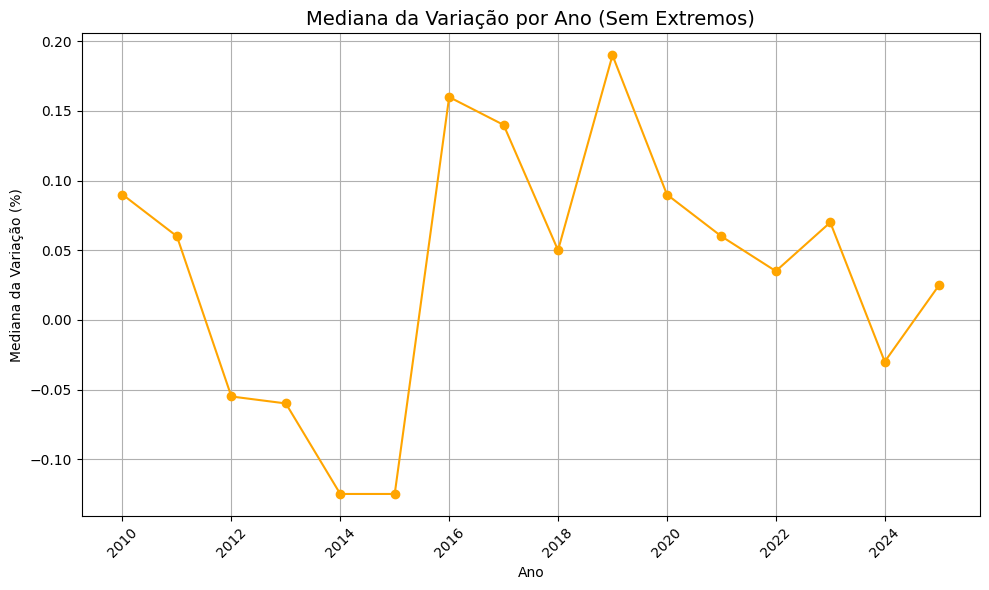

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(median_sem_extremos.index, median_sem_extremos['Var%'].values, marker='o', color='orange')
plt.title('Mediana da Variação por Ano (Sem Extremos)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Mediana da Variação (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

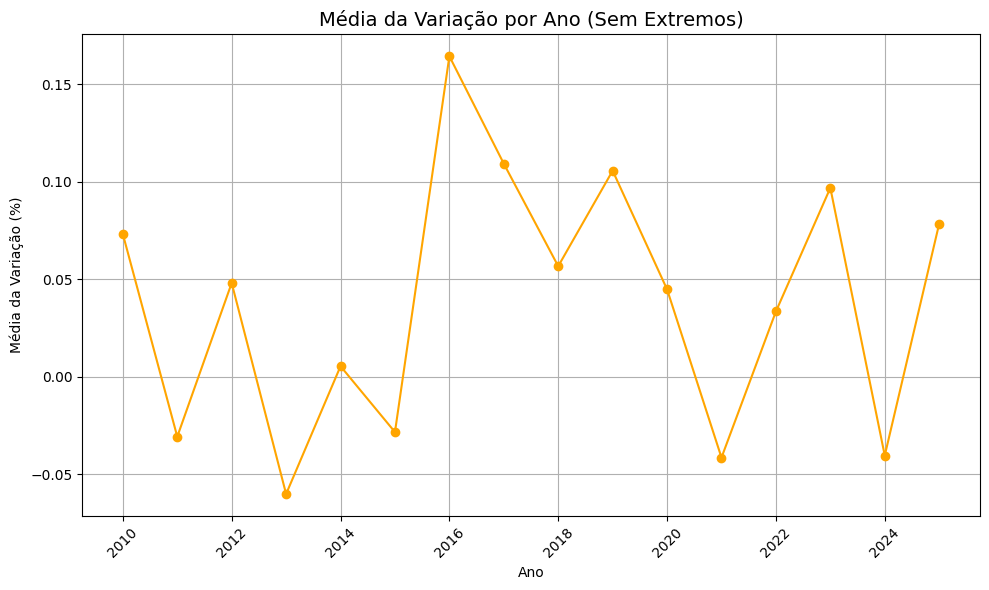

In [125]:
# Tendência da variação média ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(mean_sem_extremos.index, mean_sem_extremos['Var%'].values, marker='o', color='orange')
plt.title('Média da Variação por Ano (Sem Extremos)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Média da Variação (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
df_sem_extremos['Retorno_Dia'] = df_sem_extremos['Último'].pct_change() * 100  # variação percentual diária

In [88]:
# Target: 1 se o próximo fechamento for maior que o atual, senão 0
df_sem_extremos['Subida'] = (df_sem_extremos['Último'].shift(-1) > df_sem_extremos['Último']).astype(int)


In [89]:
df_sem_extremos['Subida_significativa'] = (df_sem_extremos['Retorno_Dia'].shift(-1) > 0.5).astype(int)


In [90]:
print(df_sem_extremos.head())

           Data  Último  Abertura  Máxima  Mínima       Vol.  Var%   Ano  \
3606 2010-12-30   69.31     68.95   69.53   68.94 2100000.00  0.51  2010   
3607 2010-12-29   68.95     68.04   69.04   68.04 1310000.00  1.34  2010   
3608 2010-12-28   68.04     67.81   68.10   67.81 1400000.00  0.35  2010   
3609 2010-12-27   67.80     68.48   68.48   67.80 1040000.00 -1.00  2010   
3610 2010-12-23   68.49     68.47   68.56   68.25 1230000.00  0.02  2010   

      Subida  Retorno_Dia  Subida_significativa  
3606       0          NaN                     0  
3607       0        -0.51                     0  
3608       0        -1.32                     0  
3609       1        -0.35                     1  
3610       0         1.01                     0  


In [95]:
# Removemos valores nulos resultantes das operações anteriores
df_sem_extremos= df_sem_extremos.dropna().reset_index(drop=True)
df_sem_extremos.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Ano,Subida,Retorno_Dia,Subida_significativa
0,2010-12-29,68.95,68.04,69.04,68.04,1310000.00,1.34,2010,0,-0.51,0
1,2010-12-28,68.04,67.81,68.10,67.81,1400000.00,0.35,2010,0,-1.32,0
2,2010-12-27,67.80,68.48,68.48,67.80,1040000.00,-1.00,2010,1,-0.35,1
3,2010-12-23,68.49,68.47,68.56,68.25,1230000.00,0.02,2010,0,1.01,0
4,2010-12-22,68.47,68.22,68.47,67.73,1660000.00,0.38,2010,0,-0.02,0


In [97]:
#Analisando a relação de cada variável x variável alvo
# Formatando o tamanho do plot
plt.rcParams["figure.figsize"] = [8.00, 4.00]
plt.rcParams["figure.autolayout"] = True

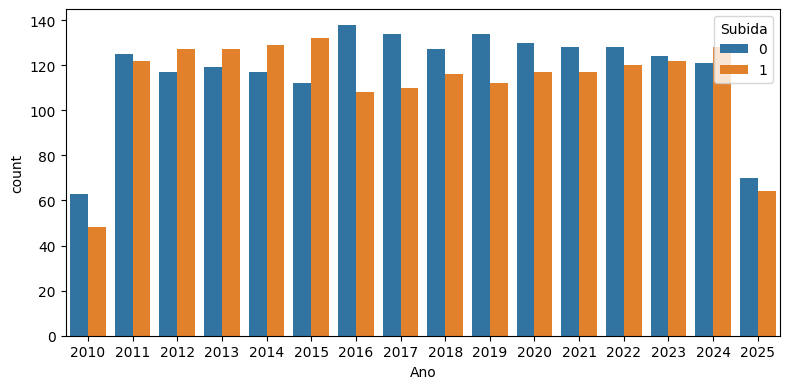

In [99]:
# Visualizando a variável ano x subida

sns.countplot(data = df_sem_extremos, x = "Ano", hue = "Subida")
plt.show()

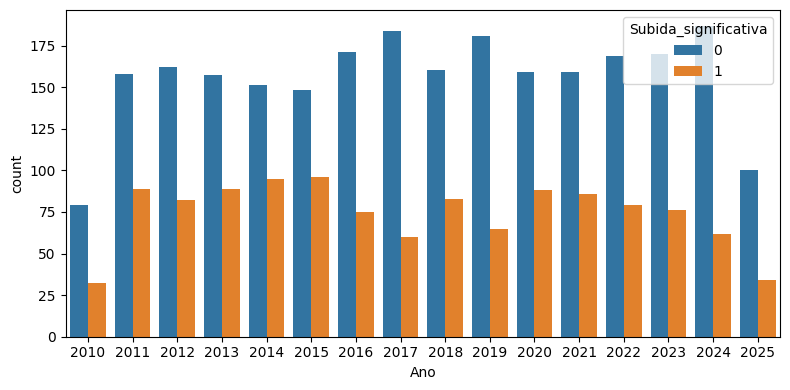

In [101]:
# Visualizando a variável ano x subida significativa

sns.countplot(data = df_sem_extremos, x = "Ano", hue = "Subida_significativa")
plt.show()

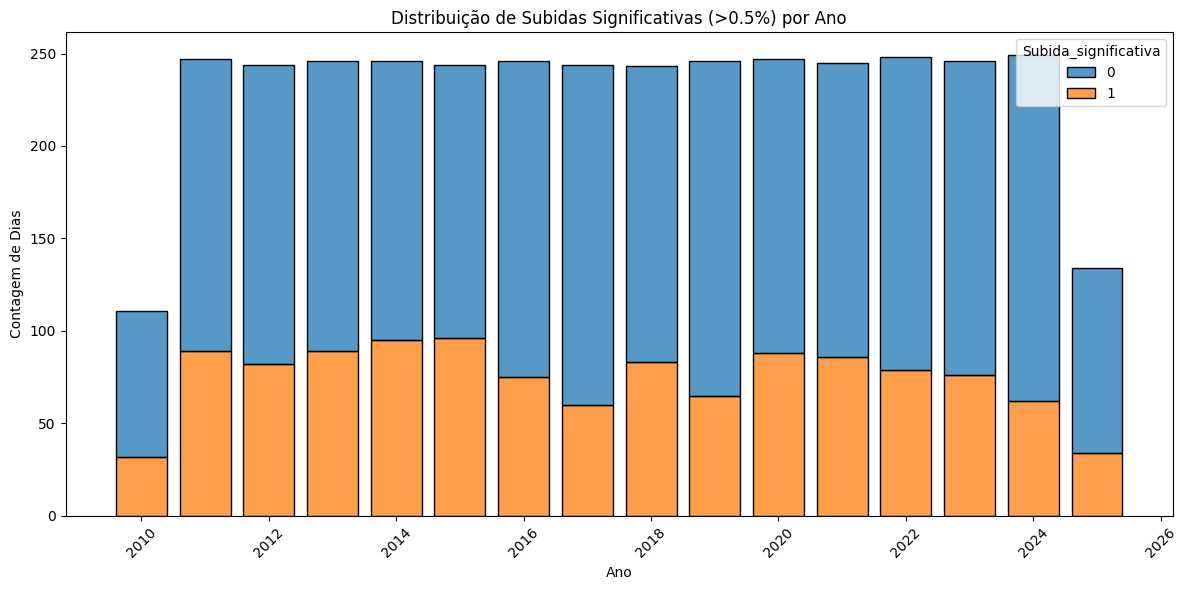

In [115]:
#analisando a distribuição de dados
#Subidas significativas

plt.figure(figsize=(12, 6))
sns.histplot(data=df_sem_extremos, x='Ano', hue='Subida_significativa', multiple='stack', shrink=0.8, discrete=True)
plt.title("Distribuição de Subidas Significativas (>0.5%) por Ano")
plt.xlabel("Ano")
plt.ylabel("Contagem de Dias")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



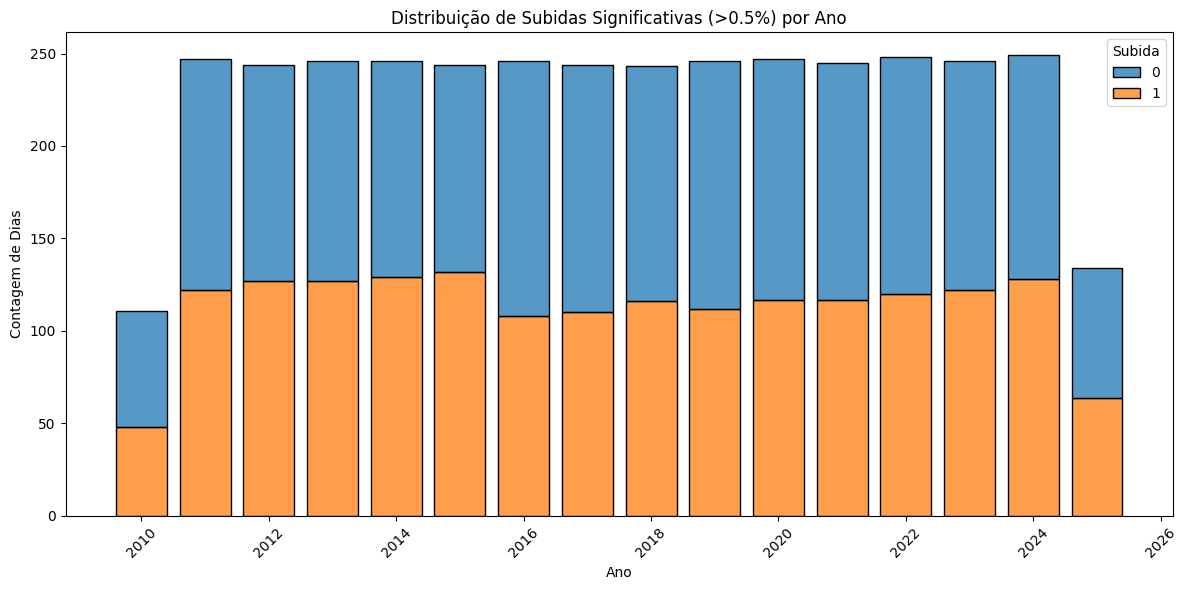

In [116]:
#analisando a distribuição de dados
#Subida
plt.figure(figsize=(12, 6))
sns.histplot(data=df_sem_extremos, x='Ano', hue='Subida', multiple='stack', shrink=0.8, discrete=True)
plt.title("Distribuição de Subidas Significativas (>0.5%) por Ano")
plt.xlabel("Ano")
plt.ylabel("Contagem de Dias")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

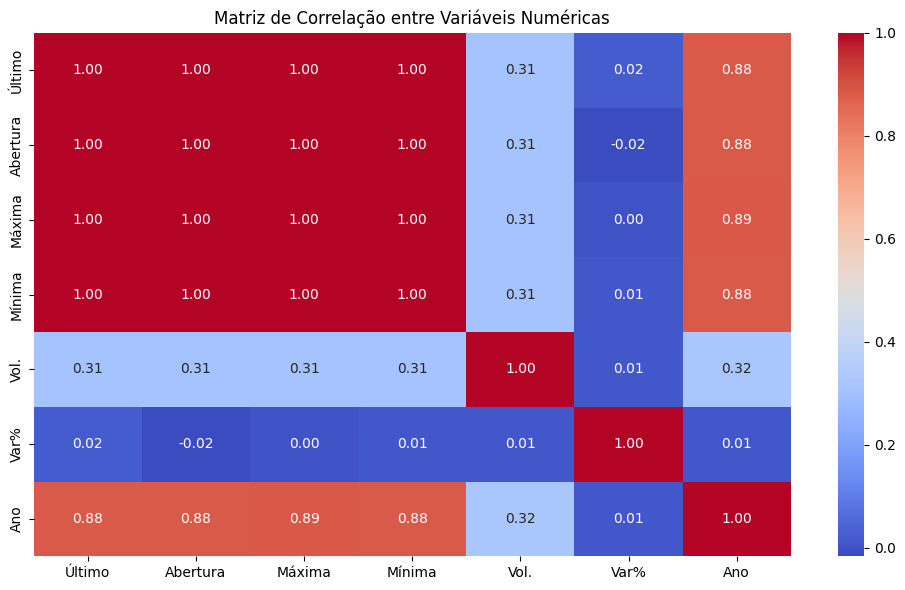

In [121]:
# Analisando se as variáveis numéricas estão relacionadas

plt.figure(figsize=(10, 6))
sns.heatmap(df_original.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

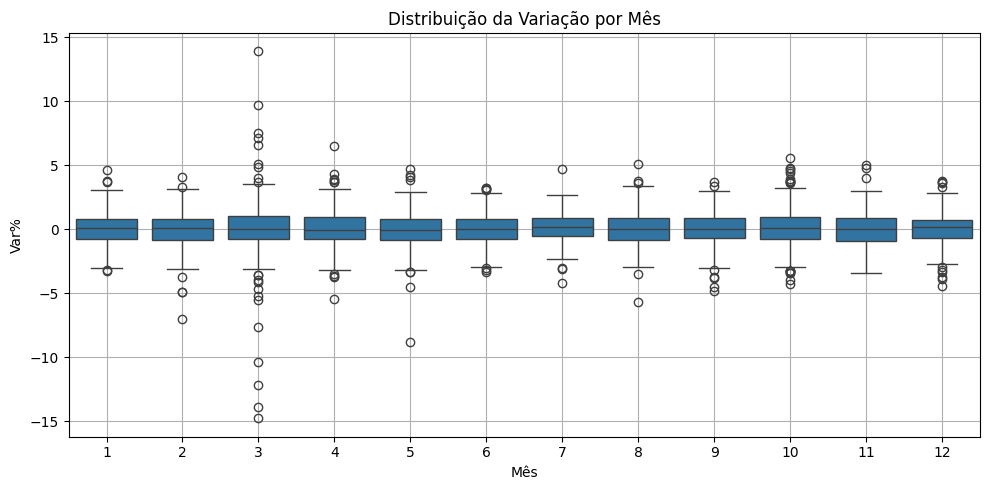

In [128]:
# Adiciona coluna com o mês da data
df_sem_extremos['Mes'] = df_sem_extremos['Data'].dt.month

# Boxplot da variação por mês
plt.figure(figsize=(10, 5))
sns.boxplot(data = df_sem_extremos, x='Mes', y='Var%')
plt.title('Distribuição da Variação por Mês')
plt.xlabel('Mês')
plt.ylabel('Var%')
plt.grid(True)
plt.show()

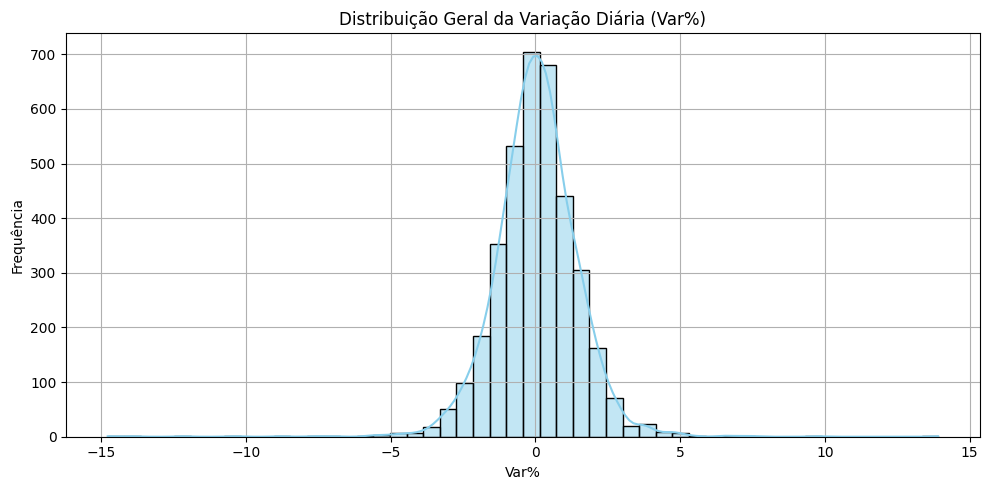

In [129]:
# Histograma com curva de densidade (distribuição da variação diária)
plt.figure(figsize=(10, 5))
sns.histplot(df_sem_extremos['Var%'], bins=50, kde=True, color='skyblue')
plt.title('Distribuição Geral da Variação Diária (Var%)')
plt.xlabel('Var%')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

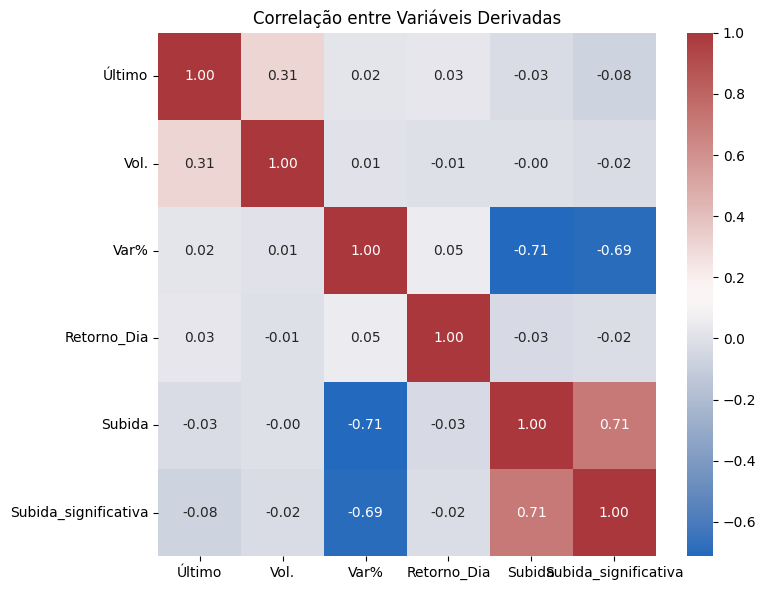

In [132]:
#Correlacionando variáveis derivadas
correlacoes = df_sem_extremos[['Último', 'Vol.', 'Var%', 'Retorno_Dia', 'Subida', 'Subida_significativa']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, cmap='vlag', fmt='.2f')
plt.title('Correlação entre Variáveis Derivadas')
plt.tight_layout()
plt.show()